# Classification with Tree Methods (Decision Tree & Random Forests)

<img src="../DATA/penguin on beach.jpg" style="max-width:400px">

​
* Contains variables:
​
    * species: penguin species (Chinstrap, Adélie, or Gentoo)
    * culmen_length_mm: culmen length (mm)
    * culmen_depth_mm: culmen depth (mm)
    * flipper_length_mm: flipper length (mm)
    * body_mass_g: body mass (g)
    * island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
    * sex: penguin sex
    
Note: The culmen is "the upper ridge of a bird's beak" 

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/penguins_dataset.csv')

In [3]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df.shape

(344, 7)

In [5]:
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

# Exploratory Data Analysis

## Missing Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [7]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [8]:
null_values = (10/344) * 100

print(f'We are Dropping {round(null_values,2)}% of data from dataset')

We are Dropping 2.91% of data from dataset


In [9]:
df= df.dropna()

In [10]:
df.isna().sum() # There are now NO Missing values.

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [12]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [13]:
df['sex'].unique() # There are 3 types of Sex in dataset. 

array(['MALE', 'FEMALE', '.'], dtype=object)

In [14]:
df = df[df['sex'] != '.'] # Remove '.' sex type from dataset because '.'  makes no sense as gender

In [15]:
df['sex'].unique() # Now ,There are Male and Female gender only

array(['MALE', 'FEMALE'], dtype=object)

In [16]:
df['species'].unique() # There are 3 types Of species

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [17]:
df['island'].unique() # There are 3 types of islands

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

# Data Visualization

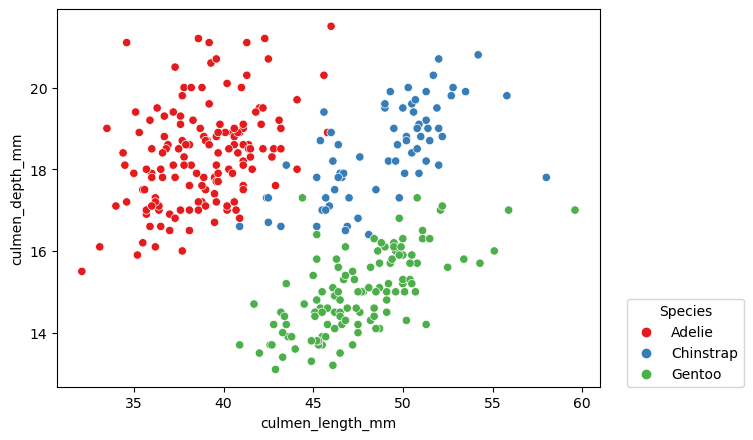

In [18]:
plt.figure(figsize=(7,5),dpi=100)
sns.scatterplot(data=df, x='culmen_length_mm', y='culmen_depth_mm', hue ='species', palette='Set1')
plt.legend(title='Species',loc=(1.05,.0))

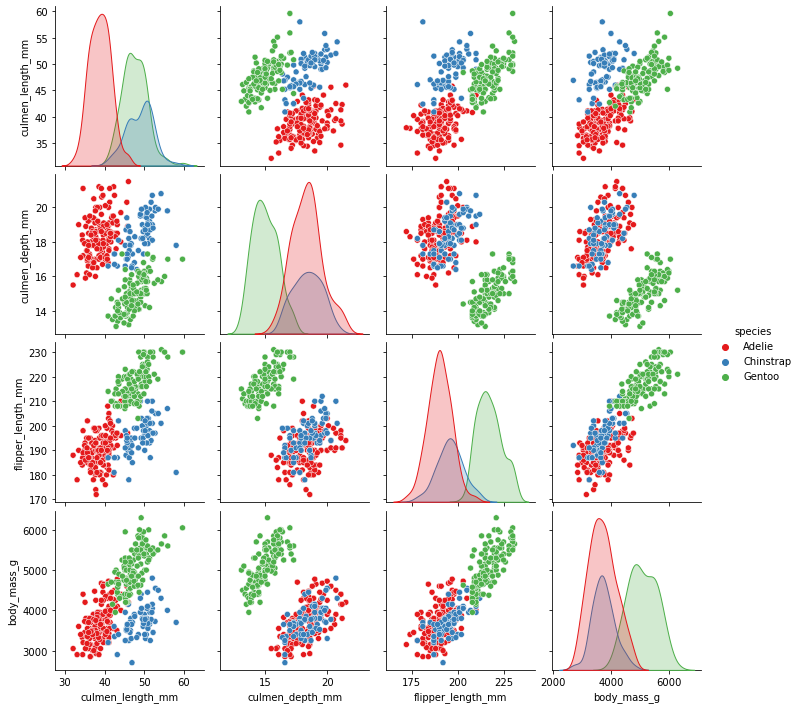

In [19]:
sns.pairplot(data=df,hue='species',palette='Set1')

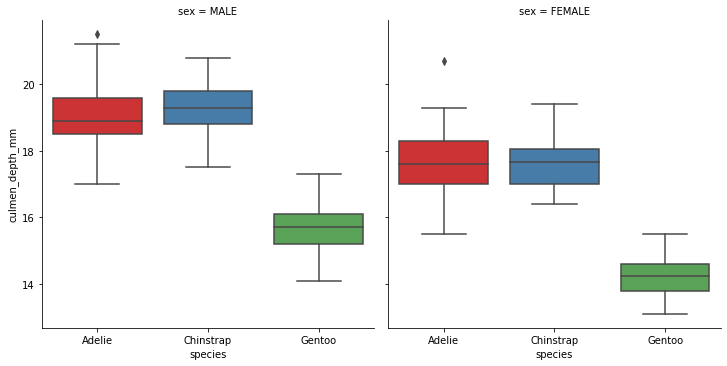

In [20]:
# Comparing Culmen Depth  across Species and Gender 
sns.catplot(data=df, x='species', y='culmen_depth_mm',col='sex', palette='Set1',kind='box') 

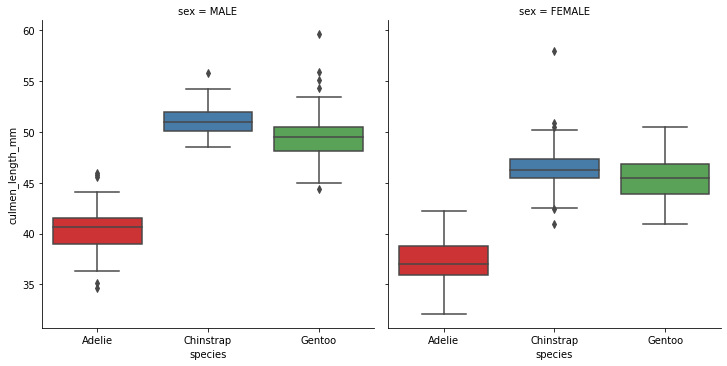

In [21]:
# Comparing Culmen Length across Species and Gender  
sns.catplot(data=df, x='species', y='culmen_length_mm',col='sex', palette='Set1',kind='box')

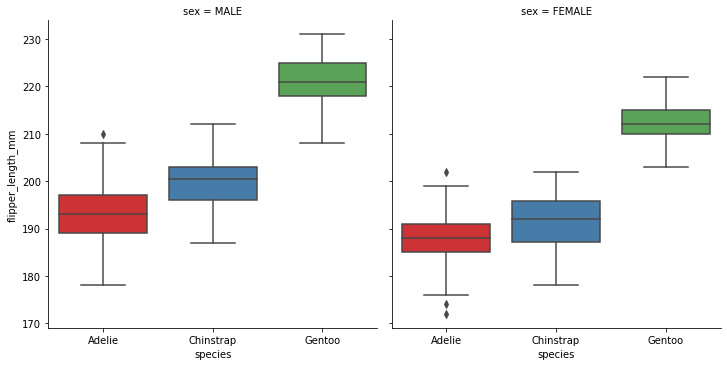

In [22]:
# Comparing Flipper Length across Species and Gender  
sns.catplot(data=df, x='species', y='flipper_length_mm',col='sex', palette='Set1',kind='box')

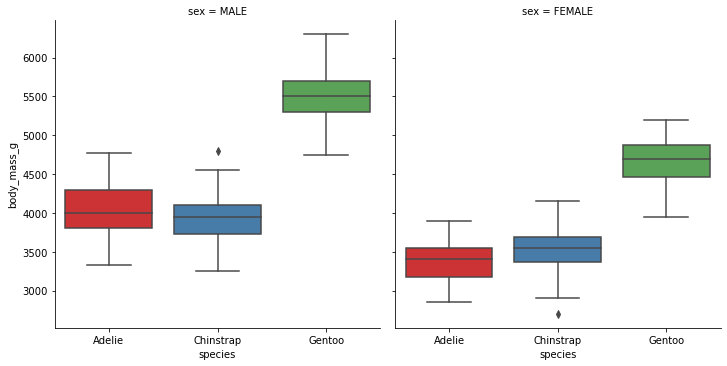

In [23]:
# Comparing Body Mass across Species and Gender  
sns.catplot(data=df, x='species', y='body_mass_g',col='sex', palette='Set1',kind='box')

# Feature Engineering

In [24]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [25]:
# One Hot Encoding
X = pd.get_dummies(df.drop(['species'], axis=1),drop_first=True) 
X # Features

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,0,1,1
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,0
340,46.8,14.3,215.0,4850.0,0,0,0
341,50.4,15.7,222.0,5750.0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,0


In [26]:
y =df['species']
y # Labels

0      Adelie
1      Adelie
2      Adelie
4      Adelie
5      Adelie
        ...  
338    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 333, dtype: object

# Scikit - Learn Train|Test Split

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [29]:
len(X_train)

233

In [30]:
len(X_test)

100

# Model #1. Decision Tree Classifier

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
DTC_model = DecisionTreeClassifier()

In [33]:
DTC_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [34]:
prediction = DTC_model.predict(X_test)

In [35]:
prediction

array(['Chinstrap', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Gentoo',
       'Adelie', 'Gentoo', 'Chinstrap', 'Adelie', 'Chinstrap', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie',
       'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap', 'Adelie', 'Adelie',
       'Gentoo', 'Chinstrap', 'Chinstrap', 'Adelie', 'Adelie',
       'Chinstrap', 'Adelie', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie',
       'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie',
       'Gentoo', 'Chinstrap', 'Chinstrap', 'Gentoo', 'Adelie',
       'Chinstrap', 'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Chinstrap', 'Gentoo', 'Adelie', 'Gentoo', 'Chinstrap', 'Adelie',
       'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Gentoo', 'Chinstrap',
       'Adelie', 'Gentoo', 'Chinstrap', 'Chinstrap', 'Chinstrap',
       'Gentoo', 'Gentoo', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie',
       'Chinstrap', 'Adeli

## Evaluation

In [36]:
from sklearn.metrics import confusion_matrix,classification_report, plot_confusion_matrix

In [37]:
confusion_matrix(y_test,prediction)

array([[38,  2,  0],
       [ 1, 26,  0],
       [ 1,  0, 32]], dtype=int64)

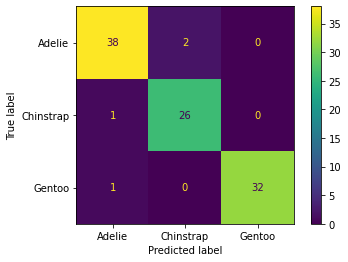

In [38]:
plot_confusion_matrix(DTC_model,X_test,y_test)

In [39]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

      Adelie       0.95      0.95      0.95        40
   Chinstrap       0.93      0.96      0.95        27
      Gentoo       1.00      0.97      0.98        33

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



In [40]:
DTC_model.feature_importances_

array([0.33350103, 0.04582245, 0.57575804, 0.        , 0.04491847,
       0.        , 0.        ])

In [41]:
X.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'island_Dream', 'island_Torgersen', 'sex_MALE'],
      dtype='object')

In [42]:
imp_features =pd.DataFrame(index=X.columns, data=DTC_model.feature_importances_, columns=['Important Features']).sort_values('Important Features')
imp_features = imp_features[imp_features['Important Features']>0]
imp_features

,Important Features
island_Dream,0.044918
culmen_depth_mm,0.045822
culmen_length_mm,0.333501
flipper_length_mm,0.575758


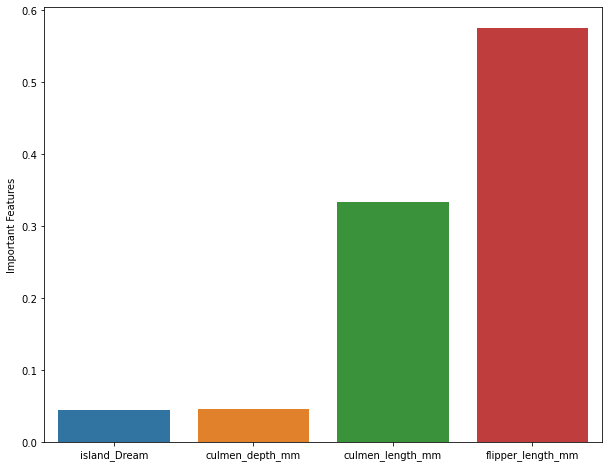

In [43]:
plt.figure(figsize=(10,8))
sns.barplot(data=imp_features, x = imp_features.index, y='Important Features');


# Visualize the Tree

In [44]:
from sklearn.tree import plot_tree

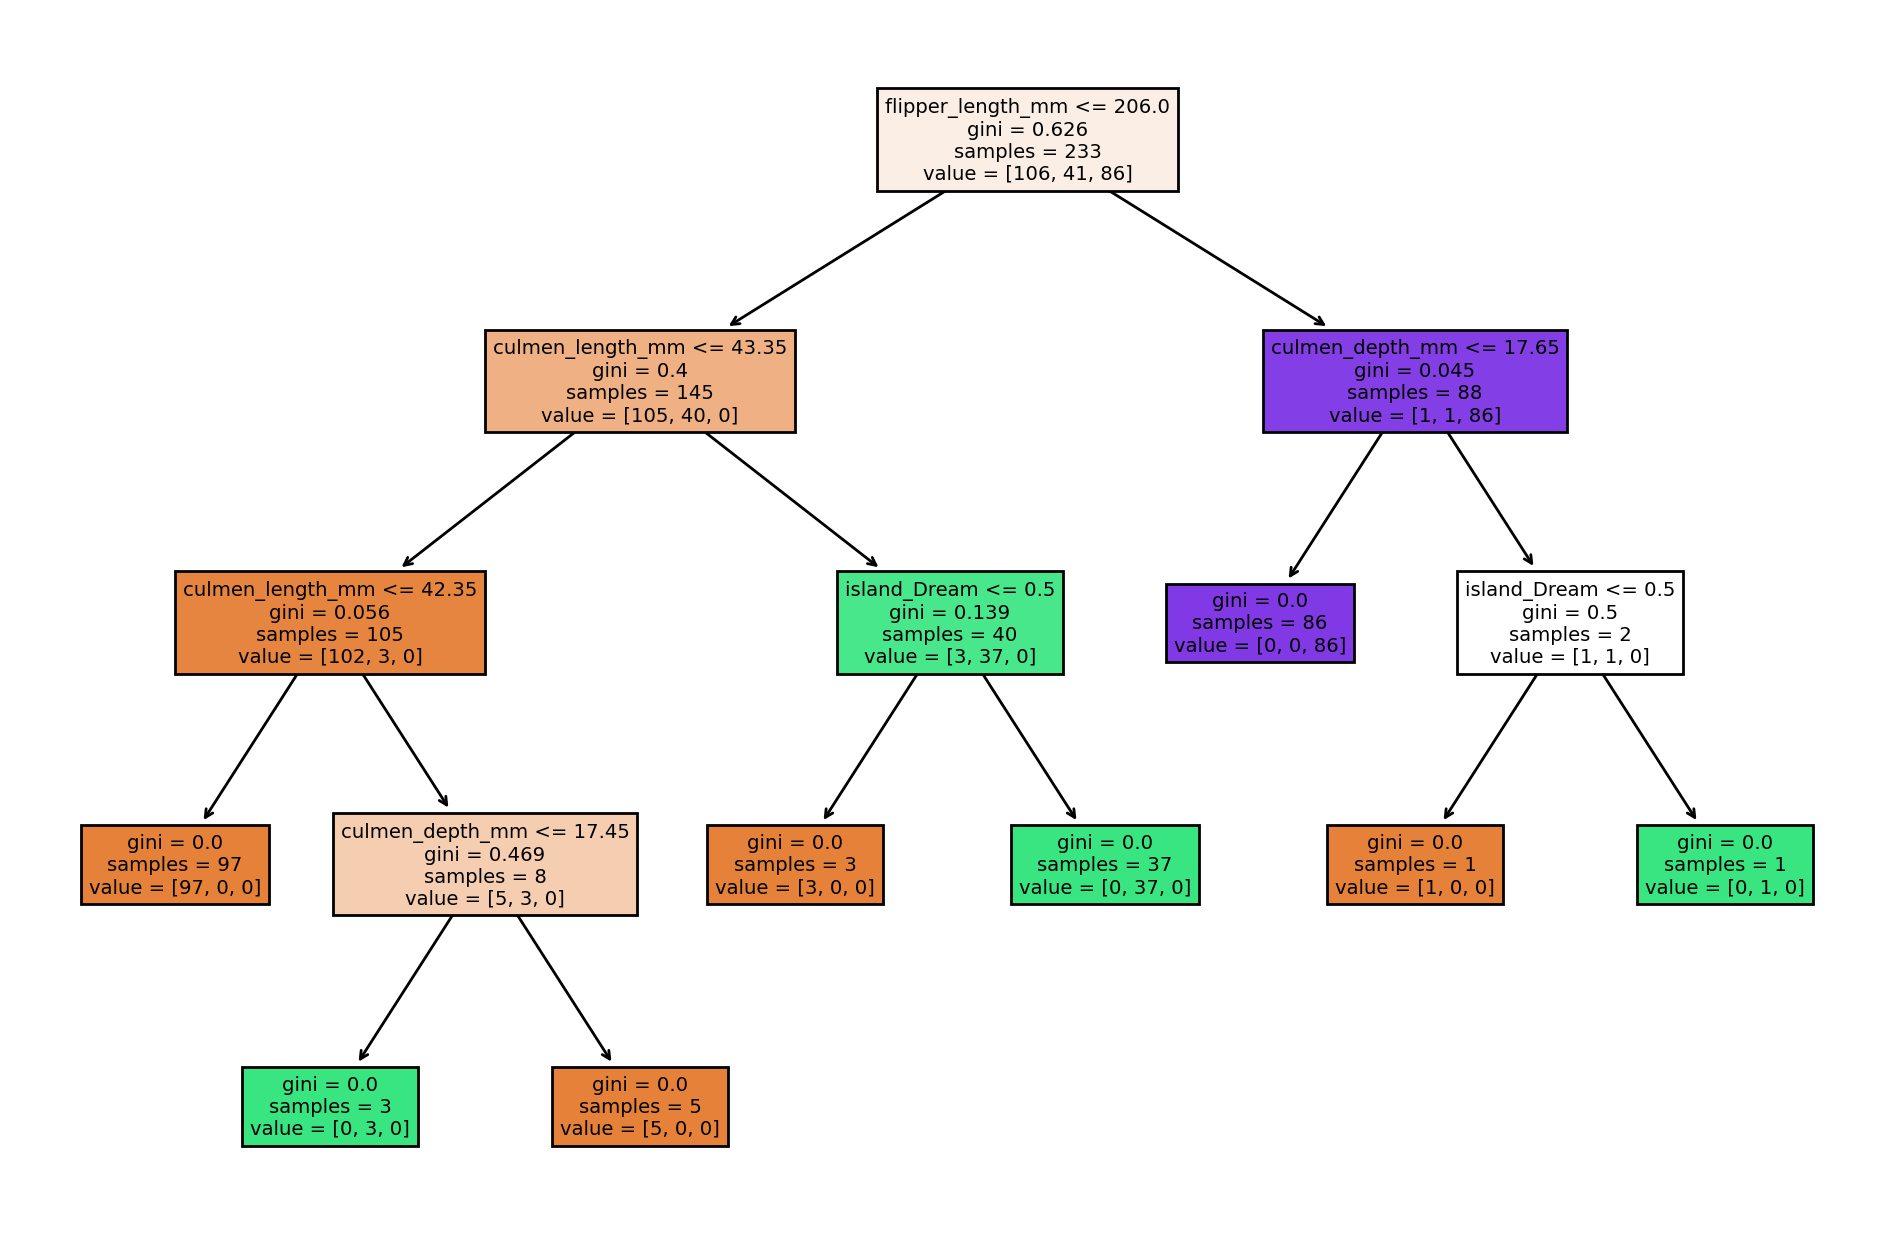

In [45]:
plt.figure(figsize=(12,8),dpi=200)
plot_tree(DTC_model,filled=True,feature_names=X.columns);

# Tuning Hyperparameters

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
criterion = ["gini", "entropy"]
splitter = ["best", "random"]
max_depth = [2,3,4,5,6]
min_samples_leaf=[1,2,3,4]
max_leaf_nodes =[2,3,4,5]

In [48]:
parameters = {'criterion':criterion,
              'splitter':splitter,
              'max_depth':max_depth,
              'min_samples_leaf':min_samples_leaf,
              'max_leaf_nodes':max_leaf_nodes
             }

In [49]:
grid_DTC_model = GridSearchCV(estimator=DTC_model,param_grid=parameters)

In [50]:
grid_DTC_model.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'max_leaf_nodes': [2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'splitter': ['best', 'random']})

In [51]:
grid_DTC_model.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_leaf_nodes': 4,
 'min_samples_leaf': 1,
 'splitter': 'best'}

In [52]:
pruned_tree = DecisionTreeClassifier(criterion='entropy',
                                     max_depth=3,
                                     max_leaf_nodes=4,
                                     min_samples_leaf=1,
                                     splitter='best'
                                    )

In [53]:
def report_model(model):
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    print(classification_report(y_test,prediction))
    plot_confusion_matrix(model,X_test,y_test)
    plt.figure(figsize=(6,4),dpi=100)
    plot_tree(model,filled=True,feature_names=X.columns)
    
    
    
    

              precision    recall  f1-score   support

      Adelie       0.95      0.95      0.95        40
   Chinstrap       0.96      0.81      0.88        27
      Gentoo       0.86      0.97      0.91        33

    accuracy                           0.92       100
   macro avg       0.92      0.91      0.91       100
weighted avg       0.92      0.92      0.92       100



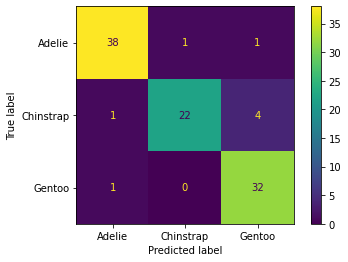

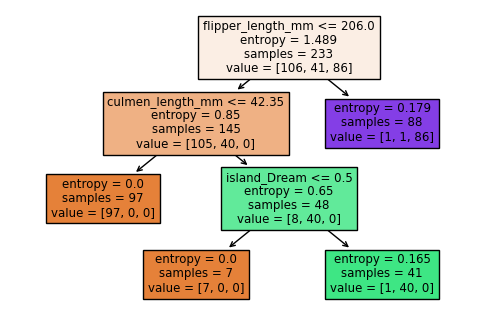

In [54]:
report_model(pruned_tree)

# Model #2. Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
RFC_model = RandomForestClassifier()

In [57]:
n_estimators = [50,100,150]
criterion= ["gini", "entropy"]
max_depth=[2,3,4,5]
bootstrap = [True,False]


In [58]:
parameters = {'n_estimators':n_estimators,
              'criterion':criterion,
              'max_depth':max_depth,
              'bootstrap':bootstrap
             }

In [59]:
grid_RFC_model = GridSearchCV(RFC_model,param_grid=parameters)

In [60]:
grid_RFC_model.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5],
                         'n_estimators': [50, 100, 150]})

In [61]:
grid_RFC_model.best_params_

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'n_estimators': 50}

In [62]:
prediction = grid_RFC_model.predict(X_test)

In [63]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

      Adelie       0.97      0.97      0.97        40
   Chinstrap       0.96      0.96      0.96        27
      Gentoo       1.00      1.00      1.00        33

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



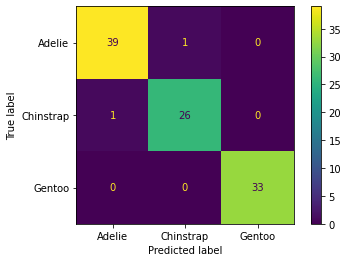

In [64]:
plot_confusion_matrix(grid_RFC_model,X_test,y_test)

In [65]:
grid_RFC_model.best_estimator_.feature_importances_

array([0.34216954, 0.14278681, 0.28648096, 0.10060713, 0.10121725,
       0.02252146, 0.00421685])

In [66]:
X.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'island_Dream', 'island_Torgersen', 'sex_MALE'],
      dtype='object')

In [67]:
imp_features =pd.DataFrame(index=X.columns, data=grid_RFC_model.best_estimator_.feature_importances_, columns=['Important Features']).sort_values('Important Features')
imp_features

,Important Features
sex_MALE,0.004217
island_Torgersen,0.022521
body_mass_g,0.100607
island_Dream,0.101217
culmen_depth_mm,0.142787
flipper_length_mm,0.286481
culmen_length_mm,0.342170


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'sex_MALE'),
  Text(1, 0, 'island_Torgersen'),
  Text(2, 0, 'body_mass_g'),
  Text(3, 0, 'island_Dream'),
  Text(4, 0, 'culmen_depth_mm'),
  Text(5, 0, 'flipper_length_mm'),
  Text(6, 0, 'culmen_length_mm')])

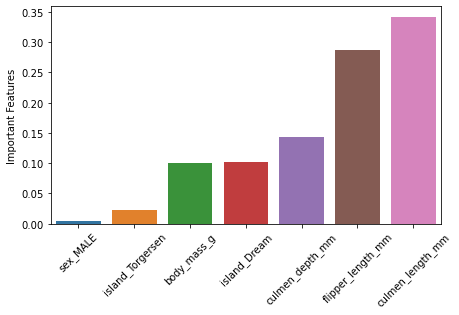

In [68]:
plt.figure(figsize=(7,4))
sns.barplot(data=imp_features, x=imp_features.index, y='Important Features')
plt.xticks(rotation=45);

# Elbow Method  - Error vs. Number of Estimators

In [69]:
from sklearn.metrics import accuracy_score

In [70]:
error = []
misclassification = []
for n in range(1,100):
    model= RandomForestClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    err = 1 - (accuracy_score(y_test,prediction))
    mis = np.sum(prediction != y_test)
    error.append(err)
    misclassification.append(mis)

Text(0, 0.5, 'Accuracy Error')

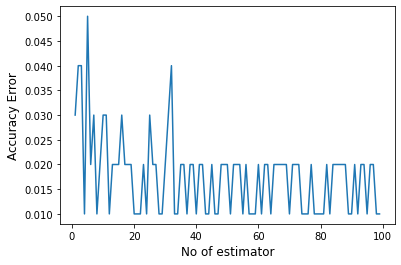

In [71]:
plt.plot(range(1,100),error)
plt.xlabel('No of estimator',fontsize=12)
plt.ylabel('Accuracy Error',fontsize=12)

# Elbow Method  - Misclassification vs. Number of Estimators

Text(0, 0.5, 'Misclassification')

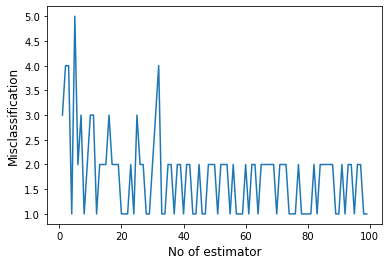

In [72]:
plt.plot(range(1,100),misclassification)
plt.xlabel('No of estimator',fontsize=12)
plt.ylabel('Misclassification',fontsize=12)

# ***********End*************